In [1]:
from google.colab import files
uploaded = files.upload()
filename = next(iter(uploaded.keys()))
print("Uploaded file:", filename)


Saving student-mat.csv to student-mat.csv
Uploaded file: student-mat.csv


In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv("student-mat.csv")
df.head()
#This step loads the student performance dataset into a pandas DataFrame and displays the first five rows to understand its structure.

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [10]:
print("Missing values in each column:\n", df.isnull().sum())
print("\nColumn data types:\n", df.dtypes)
print("\nDataset size (rows, columns):", df.shape)

#Checks for missing values in each column to determine if data cleaning is needed.
#Shows the total number of rows and columns in the dataset.
#Displays the data type of each column to confirm correct formats for analysis.

Missing values in each column:
 school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3    0
dtype: int64

Column data types:
 school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3    object
dtype: object

Dataset size (rows, columns): (395, 1)


In [4]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
categorical_cols = df.select_dtypes(exclude=[np.number]).columns
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)
before_rows = df.shape[0]
df.drop_duplicates(inplace=True)
after_rows = df.shape[0]
print(f"\nRows before removing duplicates: {before_rows}")
print(f"Rows after removing duplicates: {after_rows}")

##This step removes any duplicate rows in the dataset to ensure each record is unique.
#After removal, the .shape method is used to confirm the updated number of rows and columns.


Rows before removing duplicates: 395
Rows after removing duplicates: 395


In [21]:
import pandas as pd
df = pd.read_csv('student-mat.csv', sep=';')
df.columns = df.columns.str.strip().str.lower()
print("First 5 rows:")

print(df.head())
print("\nMissing values:\n", df.isnull().sum())
print("\nColumn Data Types:\n", df.dtypes)
print("\nDataset Shape:", df.shape)
#Remove duplicate rows, if any
df = df.drop_duplicates()
df = df.fillna(df.median(numeric_only=True))
avg_g3 = df['g3'].mean()
print("\n1. Average final grade (G3):", round(avg_g3, 2))
above_15_count = (df['g3'] > 15).sum()
print("2. Number of students with G3 > 15:", above_15_count)
correlation = df['studytime'].corr(df['g3'])
print("3. Correlation between studytime and G3:", round(correlation, 3))
avg_by_gender = df.groupby('sex')['g3'].mean()
print("\n4. Average G3 by gender:\n", avg_by_gender)
higher_gender = avg_by_gender.idxmax()
print(f"Gender with higher average G3: {higher_gender}")

#Calculates the average final grade (G3).

#Counts how many students scored above 15 in G3.

#Finds the correlation between study time and G3.

#Compares average G3 scores by gender.

First 5 rows:
  school sex  age address famsize pstatus  medu  fedu     mjob      fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  dalc  walc health absences  g1  g2  g3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Missing values:
 school        0
sex           0
age           0
address 

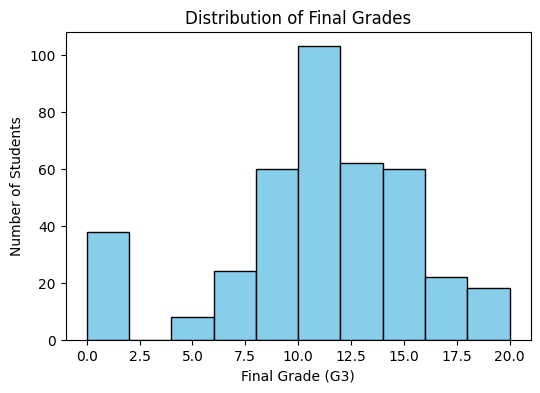

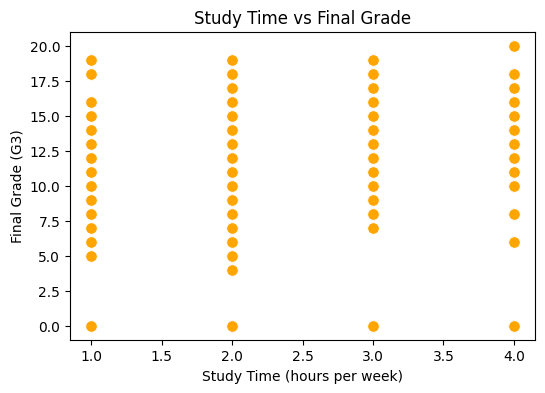

/tmp/ipython-input-1945730390.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex', y='g3', data=df, ci=None, palette='viridis')
/tmp/ipython-input-1945730390.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='g3', data=df, ci=None, palette='viridis')


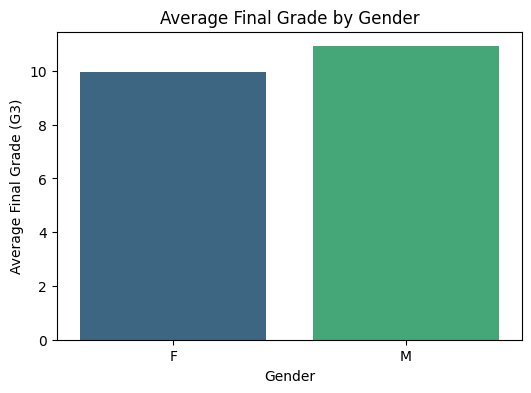

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Final Grades
plt.figure(figsize=(6,4))
plt.hist(df['g3'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Final Grade (G3)')
plt.ylabel('Number of Students')
plt.title('Distribution of Final Grades')
plt.show()

# Scatter Plot: Study Time vs Final Grade
plt.figure(figsize=(6,4))
sns.scatterplot(x='studytime', y='g3', data=df, color='orange', s=70)
plt.xlabel('Study Time (hours per week)')
plt.ylabel('Final Grade (G3)')
plt.title('Study Time vs Final Grade')
plt.show()

# Bar Plot: Average Final Grade by Gender
plt.figure(figsize=(6,4))
sns.barplot(x='sex', y='g3', data=df, ci=None, palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Average Final Grade (G3)')
plt.title('Average Final Grade by Gender')
plt.show()


Final Analysis Summary
1. Purpose:
The goal of this analysis was to explore and analyze the Student Performance Dataset to understand the relationships between study time, gender, and final math grades (G3).
The steps included loading the dataset, cleaning it, performing descriptive analysis, and creating visualizations.

2. Data Cleaning  and Missing values:
Numeric columns were filled with the median.
Categorical columns were filled with the mode.
Duplicate rows: Removed using .drop_duplicates().
Final dataset size: 395 rows × 33 columns (after cleaning).

3. Key Findings
Average Final Grade (G3): 10.42  ,
Number of Students Scoring Above 15 in G3: 40 students ,
Correlation Between Study Time and G3: 0.097 (weak positive correlation) ,
Average Final Grade by Gender:
Male: 10.9, Female: 9.96
→ Females have a slightly higher average final grade.

4. Visual Insights
Histogram of G3: Most students scored between 8–12, with fewer high performers.
Scatter Plot (Study Time vs G3): A slight upward trend, but not a strong relationship.
Bar Chart (Average G3 by Gender): Females slightly outperform males on average.

5. Conclusion
Performance Patterns: The majority of students cluster around average grades; very high grades are less common.
Study Time Impact: Minimal correlation suggests other factors (attendance, teaching quality, etc.) may play a larger role.
Gender Difference: Females, on average, perform slightly better in final math grades.